In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Library yang digunakan

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sklearn
import warnings

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# using deep learning tensorflow (decision forest)
import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

#Machine Learning
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm  # Add this line to import norm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found TF-DF 1.5.0


# Collection Data

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#menggabungkan data train dan test (concat)
df = pd.concat([train.assign(col = 1) , test.assign(col = 0)])
df = df.drop(["Id"] , axis = 1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exploring Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuilt    

## Data Understanding

- **SALEPRICE**: Harga penjualan properti dalam dolar. Ini adalah variabel target yang ingin saya prediksi.



- **MSSubClass**: Kelas bangunan
- **MSZoning**: Klasifikasi zona umum
- **LotFrontage**: Panjang linear jalan yang terhubung ke properti
- **LotArea**: Luas tanah dalam kaki persegi
- **Street**: Jenis akses jalan
- **Alley**: Jenis akses gang
- **LotShape**: Bentuk umum properti
- **LandContour**: Keturunan tanah properti
- **Utilities**: Jenis utilitas yang tersedia
- **LotConfig**: Konfigurasi lot
- **LandSlope**: Kemiringan properti
- **Neighborhood**: Lokasi fisik dalam batas kota Ames
- **Condition1**: Jarak ke jalan utama atau kereta api
- **Condition2**: Jarak ke jalan utama atau kereta api (jika kedua ada)
- **BldgType**: Tipe hunian
- **HouseStyle**: Gaya hunian
- **OverallQual**: Kualitas bahan dan penyelesaian secara keseluruhan
- **OverallCond**: Peringkat kondisi keseluruhan
- **YearBuilt**: Tanggal konstruksi asli
- **YearRemodAdd**: Tanggal renovasi
- **RoofStyle**: Jenis atap
- **RoofMatl**: Bahan atap
- **Exterior1st**: Penutup eksterior rumah
- **Exterior2nd**: Penutup eksterior rumah (jika lebih dari satu material)
- **MasVnrType**: Jenis veneer masonry
- **MasVnrArea**: Luas veneer masonry dalam kaki persegi
- **ExterQual**: Kualitas material eksterior
- **ExterCond**: Kondisi saat ini material eksterior
- **Foundation**: Jenis dasar
- **BsmtQual**: Tinggi basement
- **BsmtCond**: Kondisi umum basement
- **BsmtExposure**: Dinding basement tingkat lantai atau taman
- **BsmtFinType1**: Kualitas area selesai basement
- **BsmtFinSF1**: Luas selesai tipe 1 dalam kaki persegi
- **BsmtFinType2**: Kualitas area selesai kedua (jika ada)
- **BsmtFinSF2**: Luas selesai tipe 2 dalam kaki persegi
- **BsmtUnfSF**: Luas basement belum selesai dalam kaki persegi
- **TotalBsmtSF**: Total luas basement dalam kaki persegi
- **Heating**: Jenis pemanas
- **HeatingQC**: Kualitas dan kondisi pemanas
- **CentralAir**: Pendingin udara sentral
- **Electrical**: Sistem listrik
- **1stFlrSF**: Luas lantai pertama dalam kaki persegi
- **2ndFlrSF**: Luas lantai kedua dalam kaki persegi
- **LowQualFinSF**: Luas selesai berkualitas rendah dalam kaki persegi (semua lantai)
- **GrLivArea**: Luas area tingkat atas (ground) dalam kaki persegi
- **BsmtFullBath**: Kamar mandi basement penuh
- **BsmtHalfBath**: Kamar mandi basement setengah
- **FullBath**: Kamar mandi penuh di atas grade
- **HalfBath**: Kamar mandi setengah di atas grade
- **Bedroom**: Jumlah kamar tidur di atas basement level
- **Kitchen**: Jumlah dapur
- **KitchenQual**: Kualitas dapur
- **TotRmsAbvGrd**: Total kamar di atas grade (tidak termasuk kamar mandi)
- **Functional**: Peringkat fungsional rumah
- **Fireplaces**: Jumlah perapian
- **FireplaceQu**: Kualitas perapian
- **GarageType**: Lokasi garasi
- **GarageYrBlt**: Tahun garasi dibangun
- **GarageFinish**: Interior garasi selesai
- **GarageCars**: Ukuran garasi dalam kapasitas mobil
- **GarageArea**: Ukuran garasi dalam kaki persegi
- **GarageQual**: Kualitas garasi
- **GarageCond**: Kondisi garasi
- **PavedDrive**: Penghelaan berlapis aspal
- **WoodDeckSF**: Luas area deck kayu dalam kaki persegi
- **OpenPorchSF**: Luas area teras terbuka dalam kaki persegi
- **EnclosedPorch**: Luas area teras tertutup dalam kaki persegi
- **3SsnPorch**: Luas area teras tiga musim dalam kaki persegi
- **ScreenPorch**: Luas area teras terpal dalam kaki persegi
- **PoolArea**: Luas area kolam renang dalam kaki persegi
- **PoolQC**: Kualitas kolam renang
- **Fence**: Kualitas pagar
- **MiscFeature**: Fitur lain yang tidak termasuk dalam kategori lain
- **MiscVal**: Nilai fitur lain dalam dolar
- **MoSold**: Bulan Dijual
- **YrSold**: Tahun Dijual
- **SaleType**: Jenis penjualan
- **SaleCondition**: Kondisi penjualan


# Exploratory Data Analysis

## EDA Unvariate Analyst

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col
count,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2758.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.500000
std,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,441.791261,438.630172,386.521513,436.453656,48.614752,525.390365,0.518822,0.238712,0.550821,0.502799,0.815638,0.220300,1.625115,0.644556,24.685247,0.747187,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889,0.500086
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.500000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


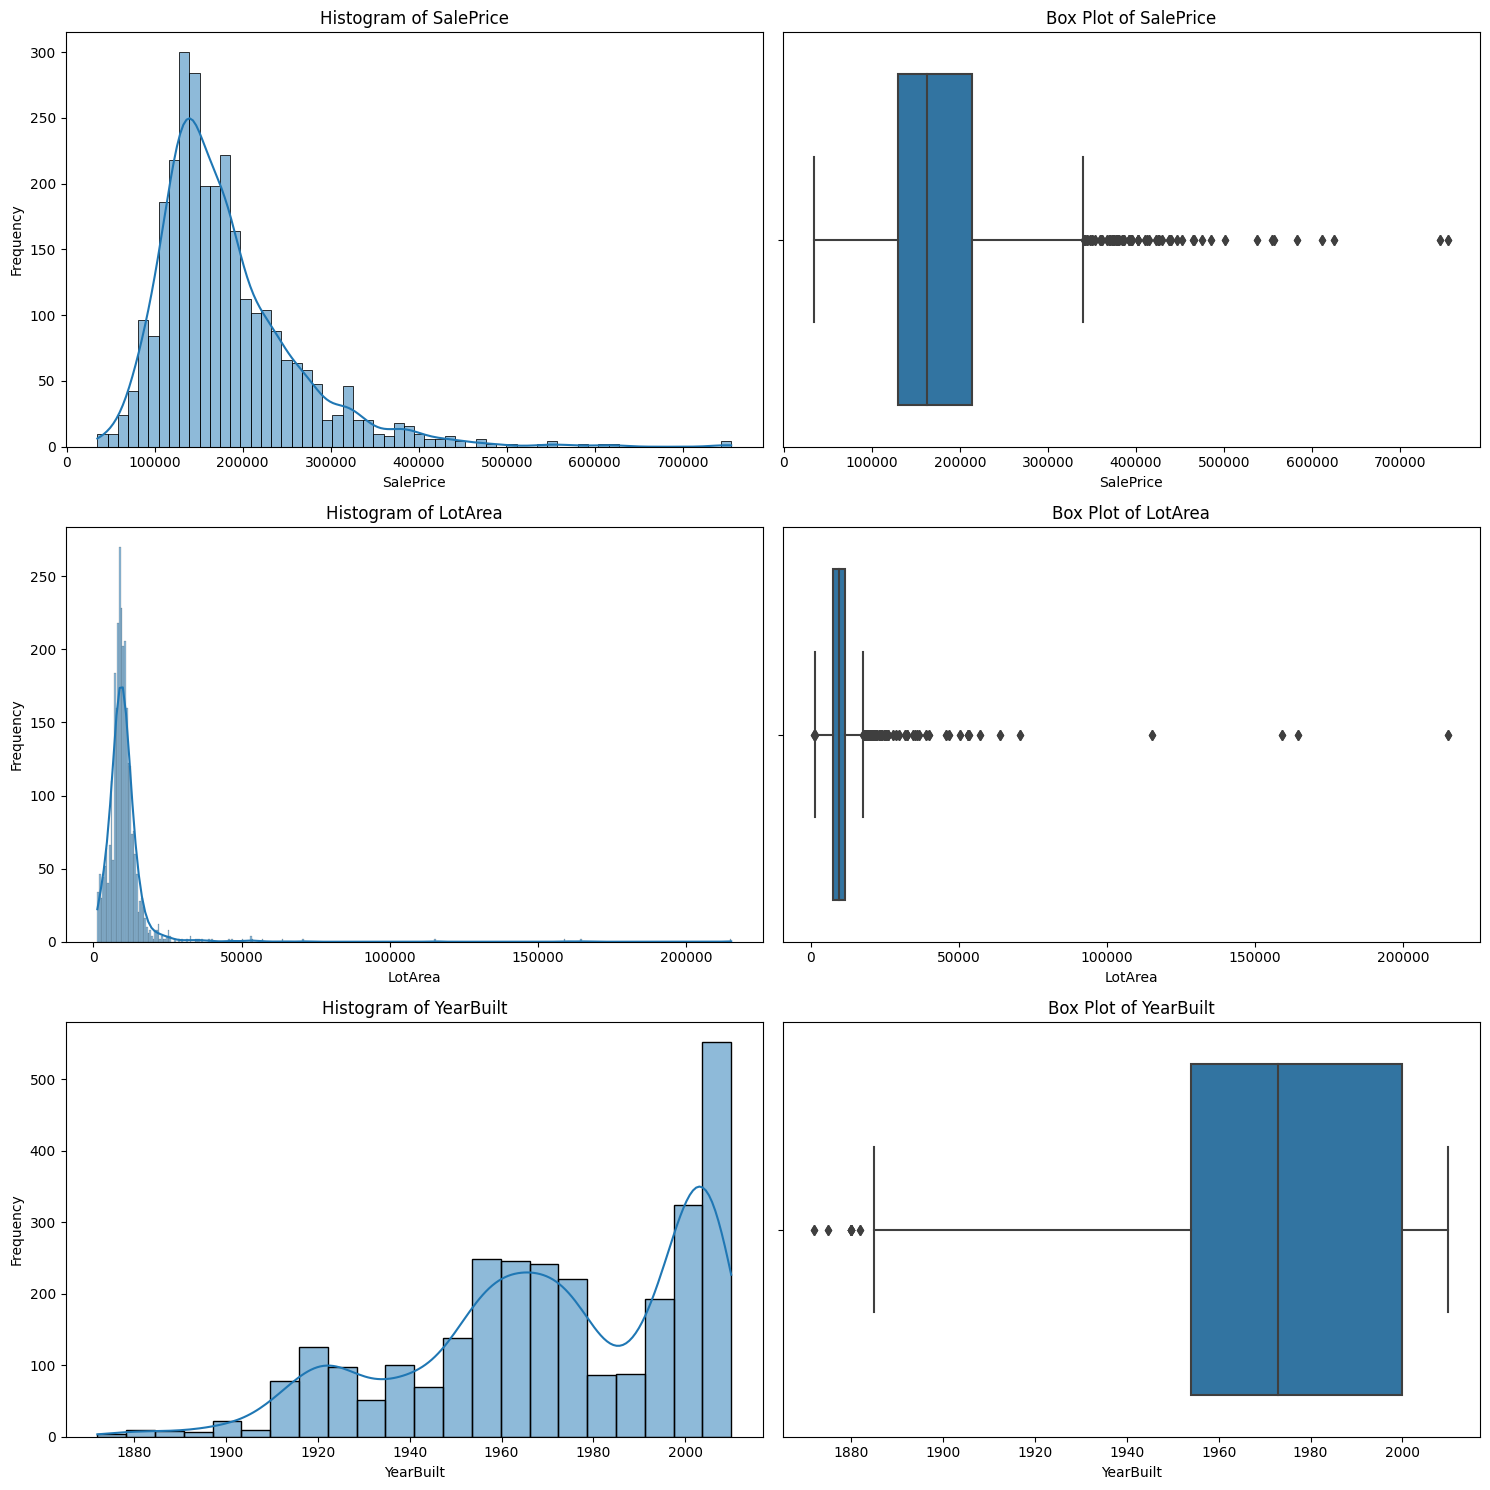

,SalePrice,LotArea,YearBuilt
count,2920.000000,2920.000000,2920.000000
mean,180921.195890,10516.828082,1971.267808
std,79428.893889,9979.555080,30.197730
min,34900.000000,1300.000000,1872.000000
25%,129975.000000,7553.500000,1954.000000
50%,163000.000000,9478.500000,1973.000000
75%,214000.000000,11601.500000,2000.000000
max,755000.000000,215245.000000,2010.000000


In [9]:
# Selecting a few key variables for univariate analysis
key_variables = ['SalePrice', 'LotArea', 'YearBuilt']

# Creating plots for each selected variable
fig, axes = plt.subplots(nrows=len(key_variables), ncols=2, figsize=(15, 5 * len(key_variables)))

for i, var in enumerate(key_variables):
    # Histogram
    sns.histplot(df[var], ax=axes[i][0], kde=True)
    axes[i][0].set_title(f'Histogram of {var}')
    axes[i][0].set_xlabel(var)
    axes[i][0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[var], ax=axes[i][1])
    axes[i][1].set_title(f'Box Plot of {var}')
    axes[i][1].set_xlabel(var)

plt.tight_layout()
plt.show()

# Calculating and displaying summary statistics for each variable
summary_statistics = df[key_variables].describe()
summary_statistics

## Bivarate Data Analysis

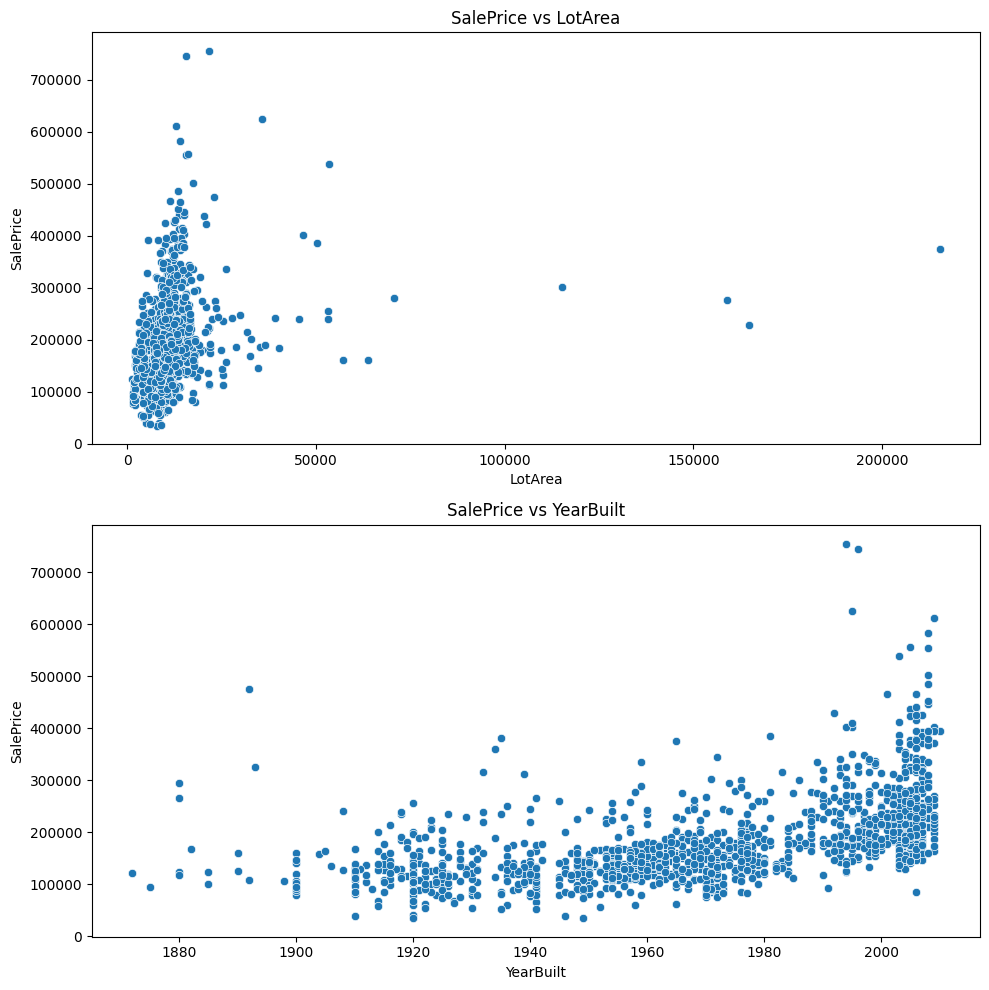

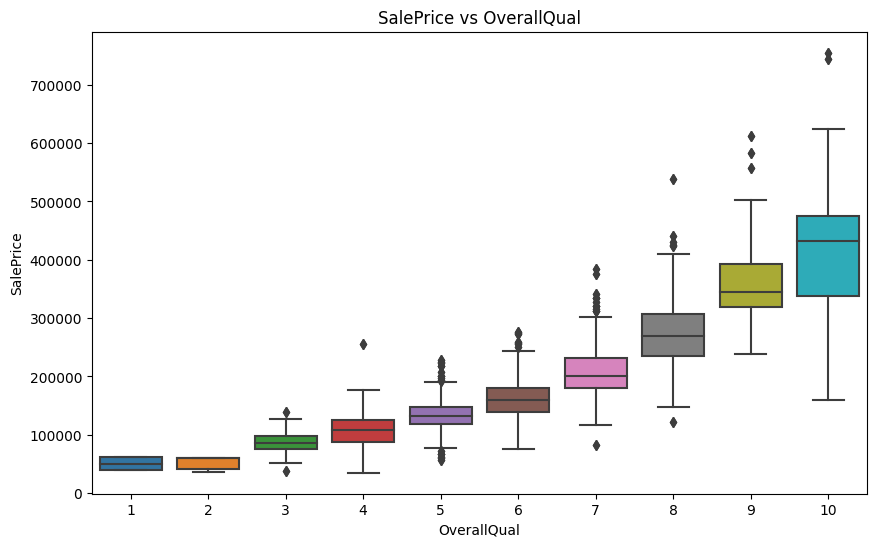

In [10]:
# Checking if 'OverallQual' exists in the dataset
'OverallQual' in df.columns

# Selecting a few key variables for bivariate analysis with 'SalePrice'
bivariate_numerical_vars = ['LotArea', 'YearBuilt']
bivariate_categorical_var = 'OverallQual' if 'OverallQual' in df.columns else None

# Creating scatter plots for numerical variables
fig, axes = plt.subplots(nrows=len(bivariate_numerical_vars), ncols=1, figsize=(10, 5 * len(bivariate_numerical_vars)))

for i, var in enumerate(bivariate_numerical_vars):
    sns.scatterplot(x=df[var], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'SalePrice vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Creating box plot for categorical variable if it exists
if bivariate_categorical_var:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[bivariate_categorical_var], y=df['SalePrice'])
    plt.title(f'SalePrice vs {bivariate_categorical_var}')
    plt.xlabel(bivariate_categorical_var)
    plt.ylabel('SalePrice')
    plt.show()

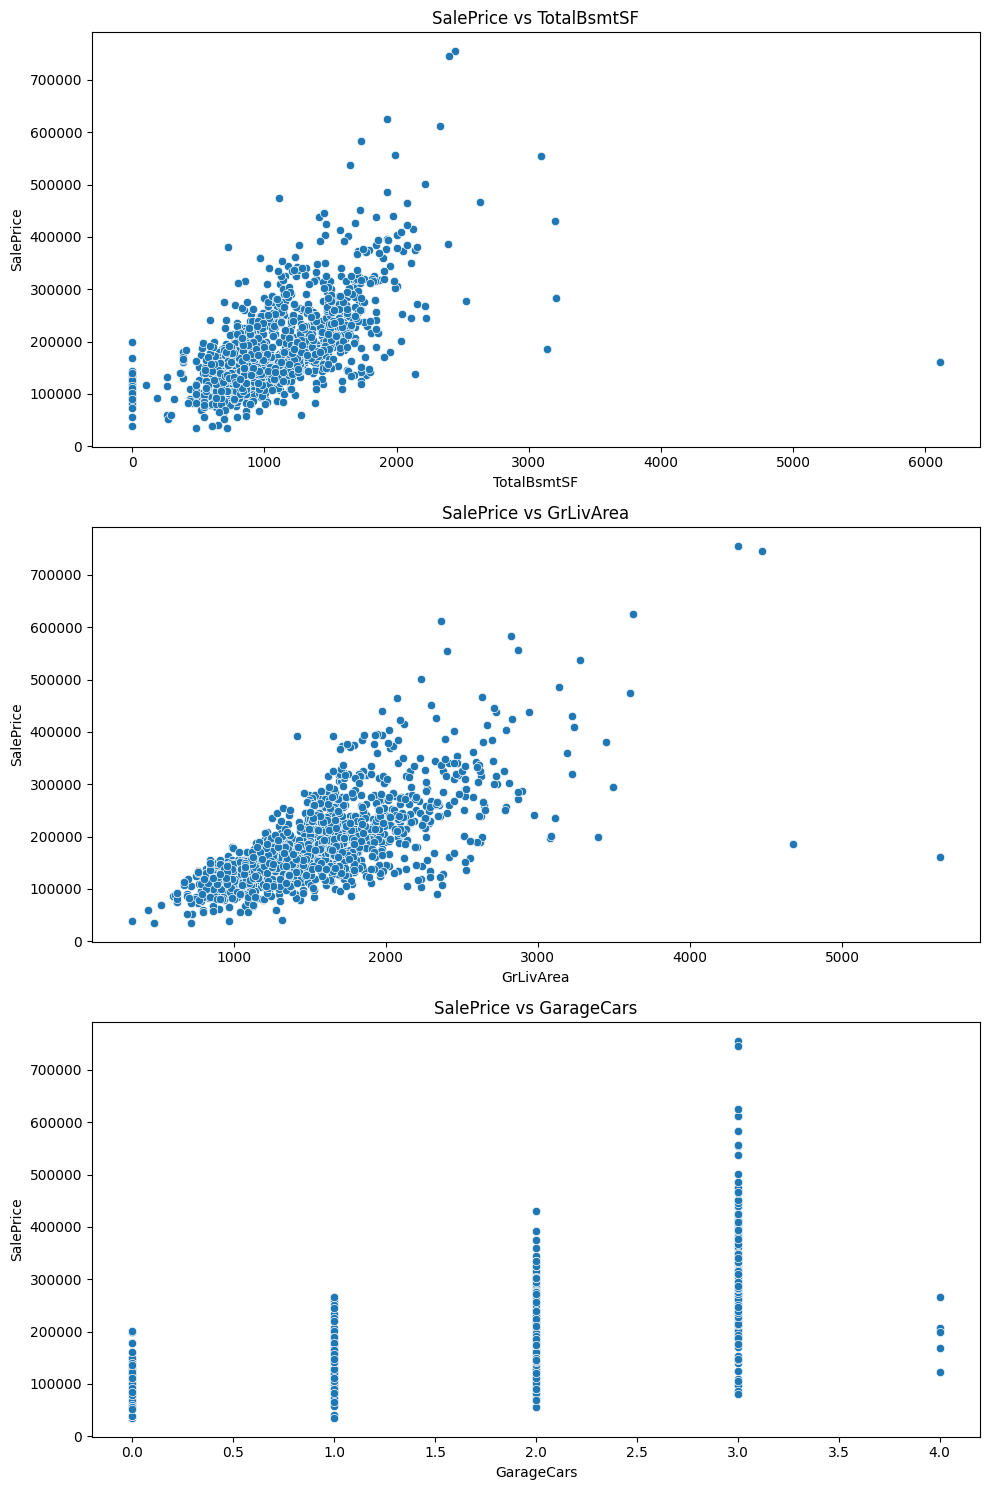

In [11]:
# Checking if 'TotalBsmtSF', 'GrLivArea', and 'GarageCars' exist in the dataset
key_vars_for_analysis = ['TotalBsmtSF', 'GrLivArea', 'GarageCars']
existing_vars = [var for var in key_vars_for_analysis if var in df.columns]

# Creating scatter plots for existing numerical variables
fig, axes = plt.subplots(nrows=len(existing_vars), ncols=1, figsize=(10, 5 * len(existing_vars)))

for i, var in enumerate(existing_vars):
    sns.scatterplot(x=df[var], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'SalePrice vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

## Distribution Data

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'data' is your DataFrame
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3

fig = make_subplots(rows=num_rows, cols=3, subplot_titles=df.columns)

for i, column in enumerate(df.columns):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Histogram(x=df[column], marker_color="#FF7733"),
        row=row, col=col
    )

fig.update_layout(height=300 * num_rows, width=1200, showlegend=False)
fig.update_traces(histnorm='probability')
fig.show()

## Correlaction Feature

In [13]:
import plotly.express as px

# Assuming 'df_train' is your DataFrame and it contains 'OverallQual' and 'SalePrice' columns
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)

# Create the box plot
fig = px.box(data, x='OverallQual', y='SalePrice')

# Customize the layout
fig.update_layout(title='Box Plot of SalePrice vs OverallQual',
                  xaxis_title='Overall Quality',
                  yaxis_title='Sale Price',
                  height=600, width=800)

# Show the plot
fig.show()

In [14]:
import plotly.express as px
import pandas as pd

# Assuming 'data' is your DataFrame with 'YearBuilt' and 'SalePrice'
data_plot = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)

# Create the box plot
fig = px.box(data_plot, x='YearBuilt', y='SalePrice')

# Customize the layout
fig.update_layout(title='Box Plot of SalePrice vs YearBuilt',
                  xaxis_title='Year Built',
                  yaxis_title='Sale Price',
                  height=600, width=1600)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


# Distribution Data Sale Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.




 mu = 12.02 and sigma = 0.40



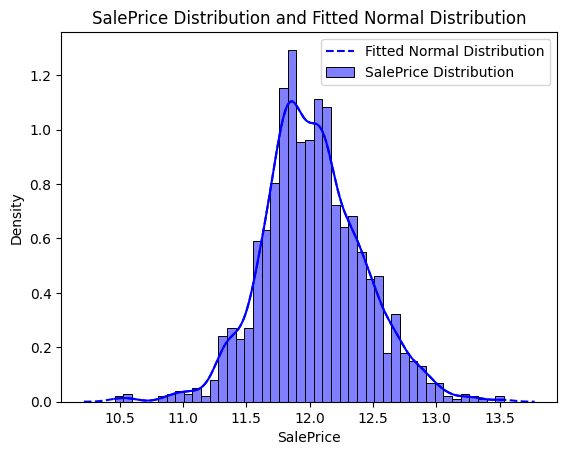

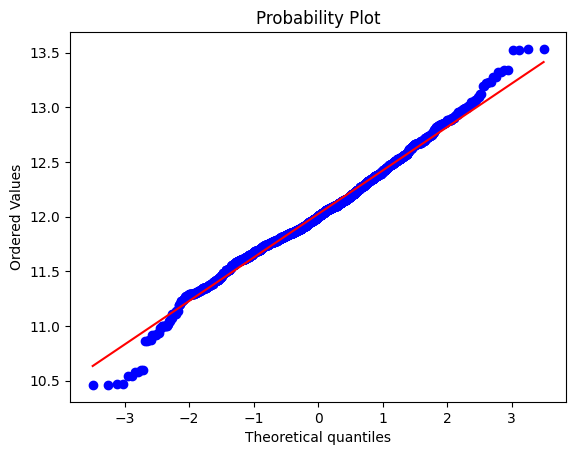

In [15]:
# Assuming 'dataset' is your DataFrame

# Check for and handle non-finite values in 'SalePrice'
df['SalePrice'] = np.log1p(df['SalePrice'].replace([np.inf, -np.inf], np.nan).dropna())

# Check the new distribution using sns.histplot
sns.histplot(df['SalePrice'], kde=True, stat="density", color="blue", label="SalePrice Distribution")
sns.kdeplot(df['SalePrice'], color="blue", linestyle="--", label="Fitted Normal Distribution")

# Get the fitted parameters used by the function (mu, sigma)
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now add the legend
plt.legend(loc='best')

# Set labels and title
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('SalePrice Distribution and Fitted Normal Distribution')

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

## Multivariate Analysis Using PCA

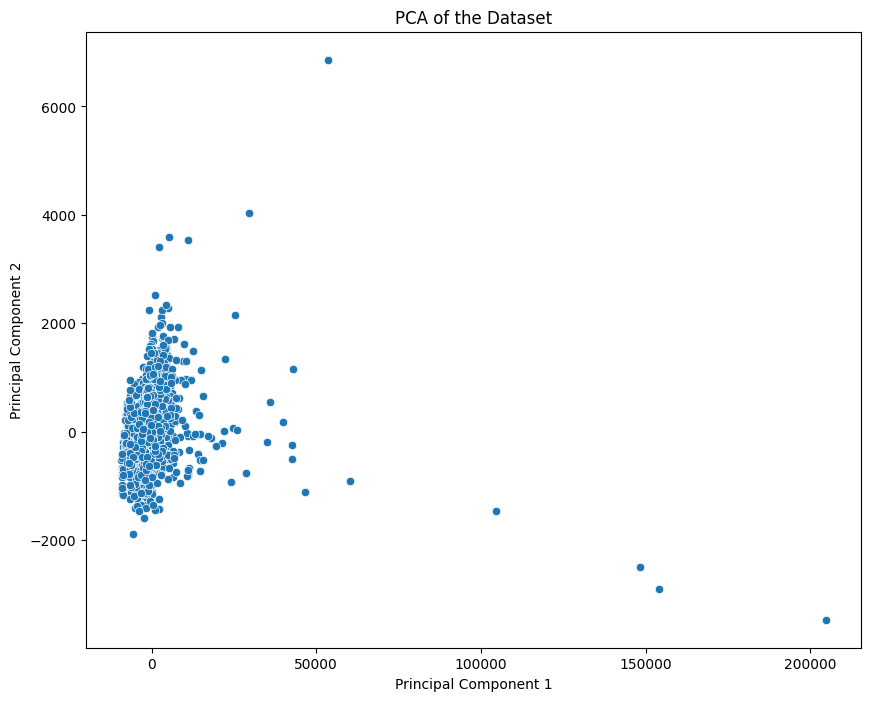

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Filling missing values with the mean of each column
numerical_data_filled = numerical_data.fillna(numerical_data.mean())

# Applying PCA
pca = PCA(n_components=2) # Reducing to 2 dimensions for visualization
principal_components = pca.fit_transform(numerical_data_filled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

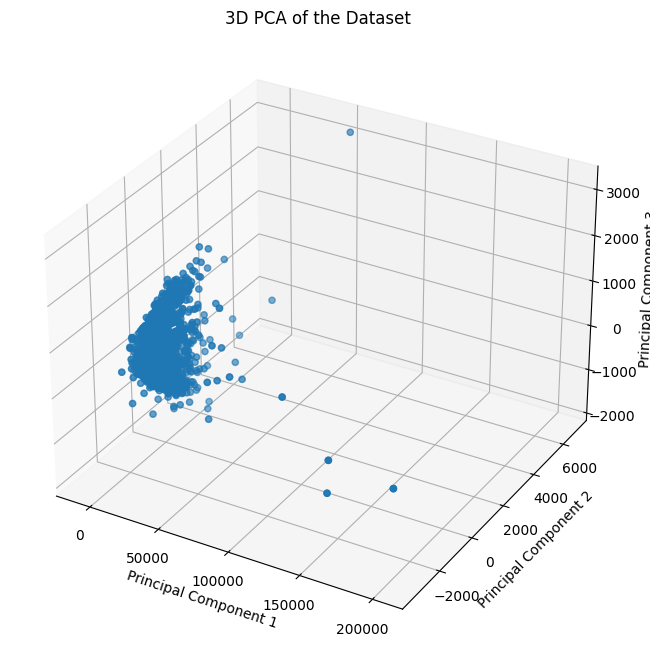

In [17]:
# Let's try another version of PCA visualization with a different approach.
# We will use a 3D scatter plot to visualize the first three principal components.

# Applying PCA for 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(numerical_data_filled)

# Creating a DataFrame for the 3D PCA results
pca_3d_df = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of the Dataset')
plt.show()

# Heatmap Correlaction Feature

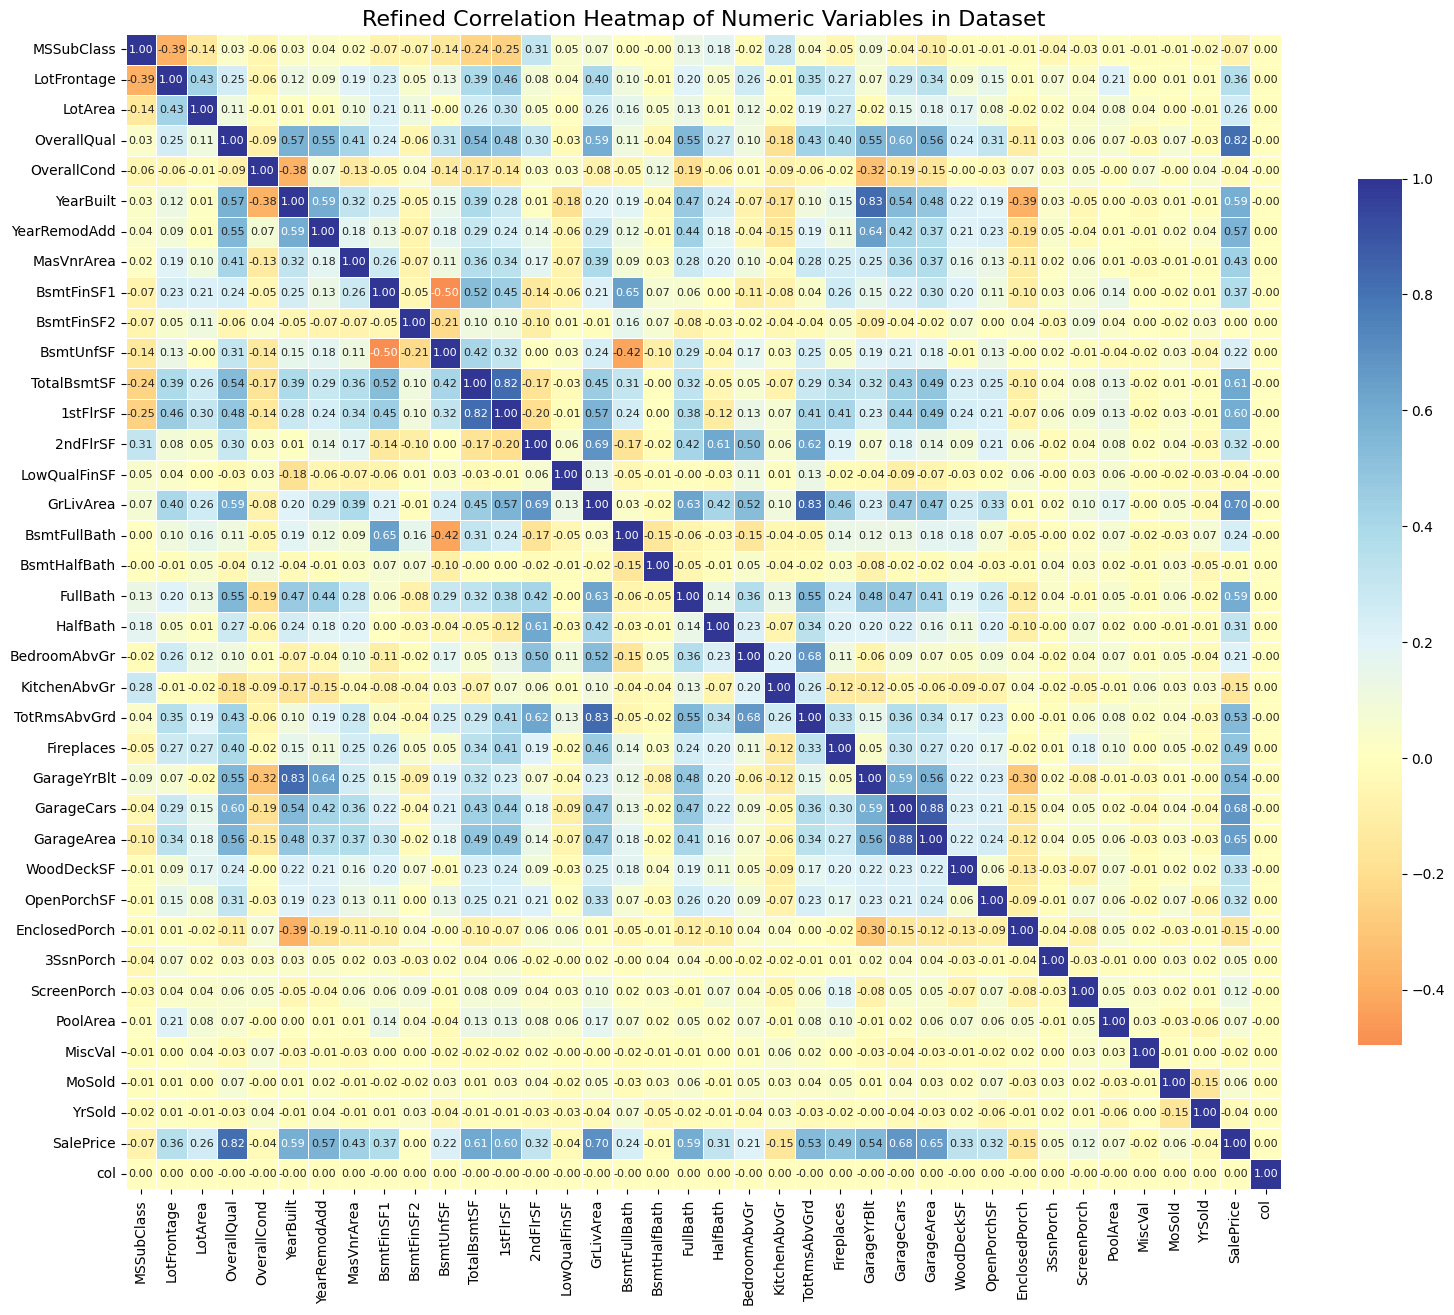

In [18]:
# Selecting only numeric columns for the correlation matrix calculation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
corr_matrix_numeric = numeric_data.corr()

# Set up the matplotlib figure with a larger size for better resolution
plt.figure(figsize=(20, 15))

# Draw the heatmap with a more nuanced color palette
sns.heatmap(corr_matrix_numeric, cmap='RdYlBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True, fmt=".2f",
            annot_kws={"size": 8})

plt.title('Refined Correlation Heatmap of Numeric Variables in Dataset', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Data Preprocessing

In [19]:
null_count = df.isnull().sum()
print(null_count)

MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
Alley            2738
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType       1744
MasVnrArea         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           74
BsmtCond           74
BsmtExposure       76
BsmtFinType1       74
BsmtFinSF1          0
BsmtFinType2       76
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          2
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [20]:
#dataframe yang memiliki null
null_count[null_count > 200]

LotFrontage     518
Alley          2738
MasVnrType     1744
FireplaceQu    1380
PoolQC         2906
Fence          2358
MiscFeature    2812
dtype: int64

In [21]:
df[["Alley" , "FireplaceQu" , "PoolQC" , "Fence" ,"MiscFeature" , "FireplaceQu" , 'LotFrontage' ,'YearBuilt']].head(10)

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature,FireplaceQu,LotFrontage,YearBuilt
0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,2003
1,NaN,TA,NaN,NaN,NaN,TA,80.0,1976
2,NaN,TA,NaN,NaN,NaN,TA,68.0,2001
3,NaN,Gd,NaN,NaN,NaN,Gd,60.0,1915
4,NaN,TA,NaN,NaN,NaN,TA,84.0,2000
5,NaN,NaN,NaN,MnPrv,Shed,NaN,85.0,1993
6,NaN,Gd,NaN,NaN,NaN,Gd,75.0,2004
7,NaN,TA,NaN,NaN,Shed,TA,NaN,1973
8,NaN,TA,NaN,NaN,NaN,TA,51.0,1931
9,NaN,TA,NaN,NaN,NaN,TA,50.0,1939


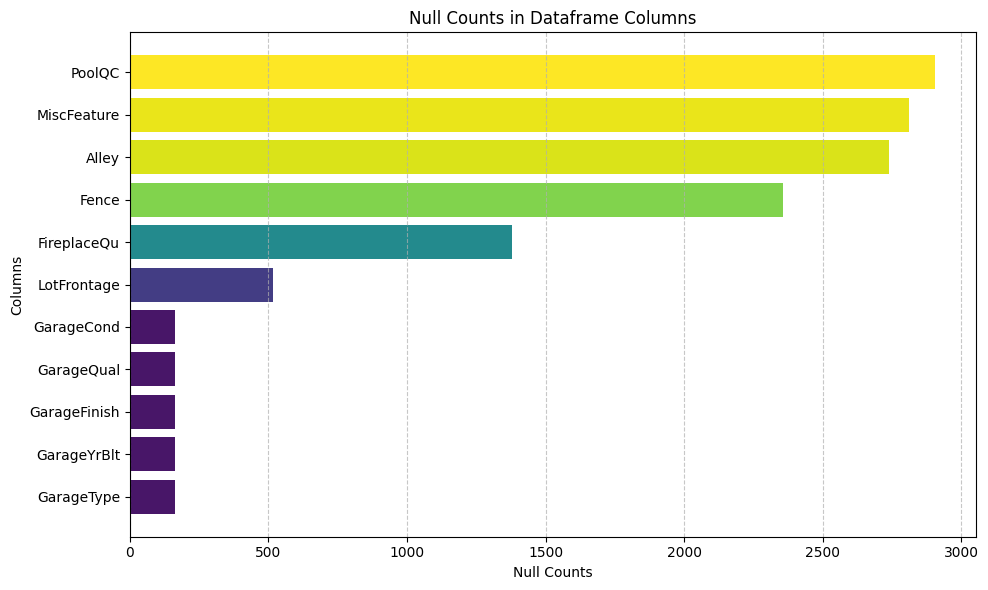

In [22]:
null_count_columns = df[["Alley" , "FireplaceQu" ,'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','LotFrontage', "PoolQC" , "Fence" ,"MiscFeature" , "FireplaceQu" , "LotFrontage"]].isnull().sum()

null_counts_df = pd.DataFrame(list(null_count_columns.items()), columns=["Column", "NullCount"])

null_counts_df.sort_values(by="NullCount", inplace=True)

# Create the bar chart with the "viridis" colormap
plt.figure(figsize=(10, 6))
plt.barh(null_counts_df["Column"], null_counts_df["NullCount"], color=plt.cm.viridis(null_counts_df["NullCount"] / max(null_counts_df["NullCount"])))
plt.xlabel("Null Counts")
plt.ylabel("Columns")
plt.title("Null Counts in Dataframe Columns")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Drop Data yang Null tidak berkaitan

In [23]:
df = df.drop(["Alley" , "FireplaceQu" , "PoolQC" , "Fence" ,"MiscFeature" , "FireplaceQu" ,'YearBuilt','MasVnrType'] , axis = 1)

In [24]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      518
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea        16
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          74
BsmtCond          74
BsmtExposure      76
BsmtFinType1      74
BsmtFinSF1         0
BsmtFinType2      76
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         2
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr 

# Imputation Data yang Missing Value dan Null pada data numerik

In [25]:
# Impute missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols_missing = numerical_cols.columns[numerical_cols.isnull().any()]

# Imputing missing values with the median
for col in numerical_cols_missing:
    df[col].fillna(df[col].median(), inplace=True)

# Check if there are still any missing values in the numerical columns
remaining_missing_values = df[numerical_cols_missing].isnull().sum()
remaining_missing_values

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

MSZoning (Klasifikasi zonasi umum): 'RL' sejauh ini merupakan nilai yang paling umum. Jadi kita bisa mengisi nilai yang hilang dengan 'RL'

In [26]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

Exterior1st dan Exterior2nd : Sekali lagi, Eksterior 1 & 2 hanya memiliki satu nilai yang hilang. Kami hanya akan mengganti string yang paling umum

In [27]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [28]:
df = df.drop(['Utilities'], axis=1)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 dan BsmtFinType2 : Untuk semua fitur terkait basement kategoris ini, NaN berarti tidak ada basement.

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

KitchenQual: Hanya satu nilai NA, dan sama seperti Electrical, kami menetapkan 'TA' (yang paling sering) untuk nilai yang hilang di KitchenQual.

In [30]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

Functional : data description says NA means typical

In [31]:
df["Functional"] = df["Functional"].fillna("Typ")

GarageType, GarageFinish, GarageQual dan GarageCond : Mengganti data yang hilang dengan None

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

GarageYrBlt, GarageArea dan GarageCars : Mengganti data yang hilang dengan 0 (Karena Tidak ada garasi = tidak ada mobil di garasi tersebut.)

In [33]:
for col in ('GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

SaleType : Isi lagi dengan yang paling sering yaitu "WD"

In [34]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath dan BsmtHalfBath : nilai yang hilang kemungkinan besar nol karena tidak memiliki ruang bawah tanah

In [35]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

ELectrical : Listrik: Ini memiliki satu nilai NA. Karena fitur ini sebagian besar memiliki 'SBrkr', kita dapat mengaturnya untuk nilai yang hilang.

In [36]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Checking Dataframe kembali

In [37]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType  

# Encoding Data Kategorical

In [38]:
#nominal features
nominal_features = ["MSSubClass", "MSZoning", "Street", "LandContour", "LotConfig", "Neighborhood", 
                "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType",
                "SaleType", "SaleCondition" ,"col"]

#ordinal features
ordinal_features =[ 
    "OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond", "HeatingQC","KitchenQual",
    "GarageQual","GarageCond","LotShape","LandSlope","BsmtExposure","BsmtFinType1",
    "BsmtFinType2","Functional","GarageFinish","PavedDrive","Utilities","CentralAir","Electrical"]

In [39]:
# label encoding to encode our ordinal values menggunakan label encoder

le = LabelEncoder()
train['OverallQual'] = le.fit_transform(train['OverallQual'])
train['OverallCond'] = le.fit_transform(train['OverallCond'])
train['ExterQual'] = le.fit_transform(train['ExterQual'])
train['ExterCond'] = le.fit_transform(train['ExterCond'])
train['BsmtQual'] = le.fit_transform(train['BsmtQual'])
train['BsmtCond'] = le.fit_transform(train['BsmtCond'])
train['HeatingQC'] = le.fit_transform(train['HeatingQC'])
train['KitchenQual'] = le.fit_transform(train['KitchenQual'])
train['GarageQual'] = le.fit_transform(train['GarageQual'])
train['GarageCond'] = le.fit_transform(train['GarageCond'])
train['LotShape'] = le.fit_transform(train['LotShape'])
train['LandSlope'] = le.fit_transform(train['LandSlope'])
train['BsmtExposure'] = le.fit_transform(train['BsmtExposure'])
train['BsmtFinType1'] = le.fit_transform(train['BsmtFinType1'])
train['BsmtFinType2'] = le.fit_transform(train['BsmtFinType2'])
train['Functional'] = le.fit_transform(train['Functional'])
train['GarageFinish'] = le.fit_transform(train['GarageFinish'])
train['PavedDrive'] = le.fit_transform(train['PavedDrive'])
train['Utilities'] = le.fit_transform(train['Utilities'])
train['CentralAir'] = le.fit_transform(train['CentralAir'])
train['Electrical'] = le.fit_transform(train['Electrical'])


df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,col
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,1
5,50,RL,85.0,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1995,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,11.870607,1
6,20,RL,75.0,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,Gable,CompShg,VinylSd,VinylSd,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,12.634606,1
7,60,RL,69.0,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,Gable,CompShg,HdBoard,HdBoard,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,12.206078,1
8,50,RM,51.0,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1950,Gable,CompShg,BrkFace,Wd Shng,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,11.774528,1
9,190,RL,50.0,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1950,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,11.678448,1


In [40]:
df['col'].unique()

array([1, 0])

In [41]:
#  Encoding to encode our nominal values

encoder = ce.HashingEncoder(n_components=2 , return_df = True)
#n_components: int
#how many bits to use to represent the feature. By default, we use 8 bits. For high-cardinality features, consider using up-to 32 bits.
df = encoder.fit_transform(df)
df.head(5)

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col
0,10,26,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,1
1,12,24,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,1
2,11,25,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,1
3,9,27,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,1
4,12,24,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,1


# Checking Outlier

In [42]:
df.describe()

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,12.358904,23.641096,56.897260,69.863699,10516.828082,6.099315,5.575342,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057,0.500000
std,2.161980,2.161980,42.293325,22.023904,9979.555080,1.382760,1.112609,20.641870,180.700413,456.019958,161.291638,441.791261,438.630172,386.521513,436.453656,48.614752,525.390365,0.518822,0.238712,0.550821,0.502799,0.815638,0.220300,1.625115,0.644556,23.992911,0.747187,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,0.399381,0.500086
min,8.000000,11.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271,0.000000
25%,11.000000,22.000000,20.000000,60.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105,0.000000
50%,12.000000,24.000000,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512,0.500000
75%,14.000000,25.000000,70.000000,79.000000,11601.500000,7.000000,6.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736,1.000000
max,25.000000,28.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474,1.000000


# Mengatasi Outlier dengan IQR Method

In [43]:
# we want to use Statistical Methods
threshold = 3
# identify outliers using z-score method
outliers = df[(np.abs(df - df.mean() / df.std()) > threshold).any(axis = 1)]
outliers.head(5)

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col
0,10,26,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,1
1,12,24,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,1
2,11,25,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,1
3,9,27,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,1
4,12,24,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,1


In [44]:
threshold = 3
# removing outliers using z-score method
no_outliers = df[(np.abs(df - df.mean() / df.std()) <= threshold).any(axis = 1)]
df = no_outliers
df.head(5)

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,col
0,10,26,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,1
1,12,24,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,1
2,11,25,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,1
3,9,27,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,1
4,12,24,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,1


# Spliting Data Train Dan Test

In [45]:
dataset_train = df[df['col'] ==1]
X = dataset_train.drop('SalePrice' , axis =1)
y = dataset_train['SalePrice']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

dataset_test = df[df['col'] ==0]
dataset_test =dataset_test.drop(['SalePrice'] , axis = 1)
dataset_test.dropna(inplace = True)
dataset_test.head(5)

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,col
0,10,26,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0
1,12,24,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0
2,11,25,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0
3,9,27,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0
4,12,24,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0


# Transformasi Data menggunakan Standarisasi Machine Learning

In [46]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test) , columns = X.columns)

In [47]:
X_train.head(5)

,col_0,col_1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,col
0,0.235294,0.764706,0.411765,0.157534,0.034948,0.444444,0.714286,0.883333,0.0000,0.192062,0.0,0.080479,0.208183,0.215236,0.495726,0.0,0.351545,0.666667,0.0,0.666667,1.0,0.500,1.0,0.583333,0.000000,0.727273,0.0,0.000000,0.000000,0.127971,0.000000,0.000000,0.0,0.0,0.0,0.727273,0.50,0.0
1,0.588235,0.411765,1.000000,0.133562,0.044404,0.333333,0.714286,0.833333,0.0000,0.000000,0.0,0.000000,0.000000,0.082607,0.320513,0.0,0.180859,0.000000,0.0,0.666667,0.0,0.375,1.0,0.416667,0.000000,0.727273,0.0,0.000000,0.298913,0.208410,0.380435,0.000000,0.0,0.0,0.0,0.636364,0.50,0.0
2,0.352941,0.647059,0.000000,0.150685,0.034901,0.666667,0.428571,0.916667,0.0000,0.004252,0.0,0.550514,0.214403,0.223956,0.000000,0.0,0.183873,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.954545,0.5,0.282087,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.545455,0.00,0.0
3,0.235294,0.764706,0.235294,0.208904,0.046680,0.666667,0.571429,0.650000,0.2125,0.074592,0.0,0.165240,0.132079,0.192978,0.431090,0.0,0.310475,0.000000,0.0,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.809091,0.5,0.405501,0.000000,0.153565,0.000000,0.385827,0.0,0.0,0.0,0.000000,0.25,0.0
4,0.235294,0.764706,0.235294,0.140411,0.028582,0.555556,0.428571,0.900000,0.0000,0.134479,0.0,0.034247,0.137316,0.121615,0.389423,0.0,0.237189,0.333333,0.0,0.666667,0.5,0.375,0.5,0.500000,0.333333,0.945455,0.5,0.280677,0.135870,0.137112,0.000000,0.000000,0.0,0.0,0.0,0.272727,0.50,0.0


# Feature Korelasi

In [48]:
import plotly.express as px
import pandas as pd

# Calculating the correlation matrix
corr = df.corr()

# Using Plotly to create an interactive heatmap
fig = px.imshow(corr, 
                x=corr.columns, 
                y=corr.columns,
                color_continuous_scale='RdBu', # Red and Blue color scale
                zmin=-1, zmax=1) # Setting the scale from -1 to 1 for correlation

fig.update_layout(width=800, height=800) # Adjusting the size of the plot
fig.show()


# Feature Selection Using Machine Learning

In [49]:
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined in your environment

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Using Plotly to create a bar chart for feature importances
fig = px.bar(importances_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             color='Importance', 
             color_continuous_scale='Viridis')

# Updating layout for better readability
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance',
    yaxis_title='Feature',
    height=600
)

# Showing the Plotly figure
fig.show()

# Drop Feature yang kurang penting dalam df

In [50]:
X_train = X_train.drop(["col" ,"3SsnPorch" ,"MiscVal" ,"LowQualFinSF" ,"BsmtFullBath" ,"KitchenAbvGr" ,"EnclosedPorch" , "MiscVal" , "PoolArea","BsmtFinSF2" ,"HalfBath"] , axis = 1)
X_test = X_test.drop(["col" ,"3SsnPorch" ,"MiscVal" ,"LowQualFinSF" ,"BsmtFullBath" ,"KitchenAbvGr" ,"EnclosedPorch" , "MiscVal" , "PoolArea","BsmtFinSF2" ,"HalfBath"] , axis = 1)
dataset_test = dataset_test.drop(["col" ,"3SsnPorch" ,"MiscVal" ,"LowQualFinSF" ,"BsmtFullBath" ,"KitchenAbvGr" ,"EnclosedPorch" , "MiscVal" , "PoolArea","BsmtFinSF2" ,"HalfBath"] , axis = 1)

# Modeling Using Machine Learning

## SVM

In [51]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create and fit the SVR (Support Vector Regressor) model with default parameters
SV = svm.SVR()
SV.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(SV, X_train, y_train, cv=10)
mean_score = scores.mean()

print("Score:", mean_score)

Score: 0.866807129796111


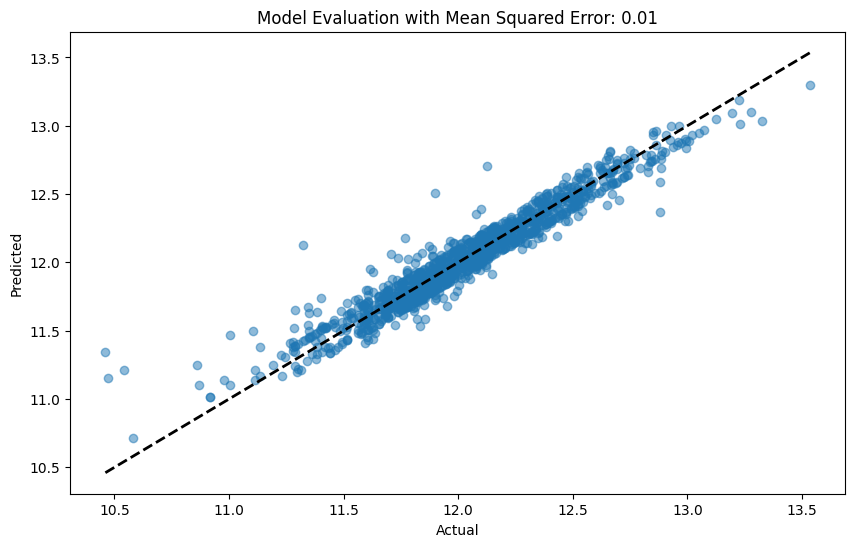

Mean Squared Error: 0.0115860747993767


In [52]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming SV is your trained model, and X_train, y_train are your training data and labels
# Replace 'SV' with the variable name of your trained model

# Predicting on the training data
y_pred = SV.predict(X_train)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Model Evaluation with Mean Squared Error: {mse:.2f}')
plt.show()

print("Mean Squared Error:", mse)

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the DecisionTreeRegressor model with default parameters
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(DTR, X_train, y_train, cv=10)
mean_score2 = scores.mean()

print("Score:", mean_score2)

Score: 0.6929682089311568


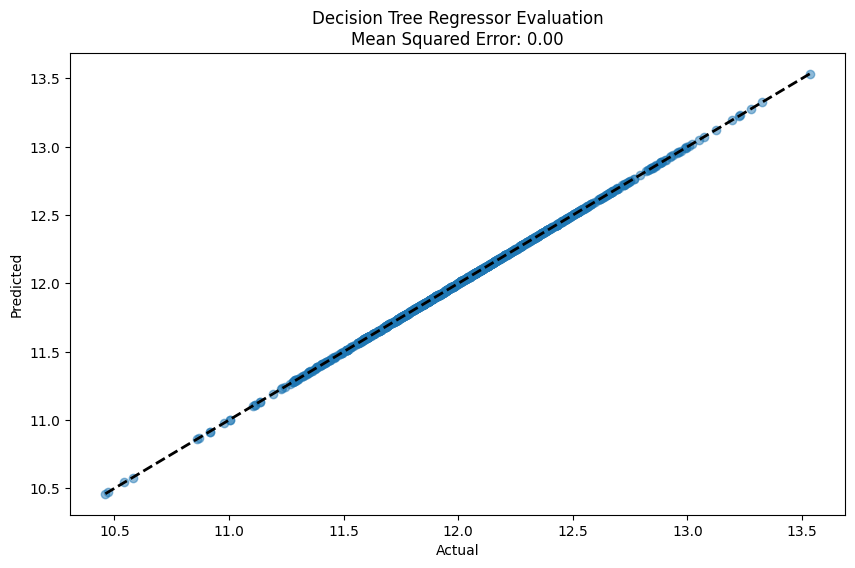

0.0

In [54]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Predicting on the training data
y_pred_dtr = DTR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the Decision Tree Regressor
mse_dtr = mean_squared_error(y_train, y_pred_dtr)

# Plotting the actual vs predicted values for the Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_dtr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Decision Tree Regressor Evaluation\nMean Squared Error: {mse_dtr:.2f}')
plt.show()

mse_dtr

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the RandomForestRegressor model with default parameters
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(RFR, X_train, y_train, cv=10)
mean_score_rf = scores.mean()

mean_score_rf

0.8543946956965472

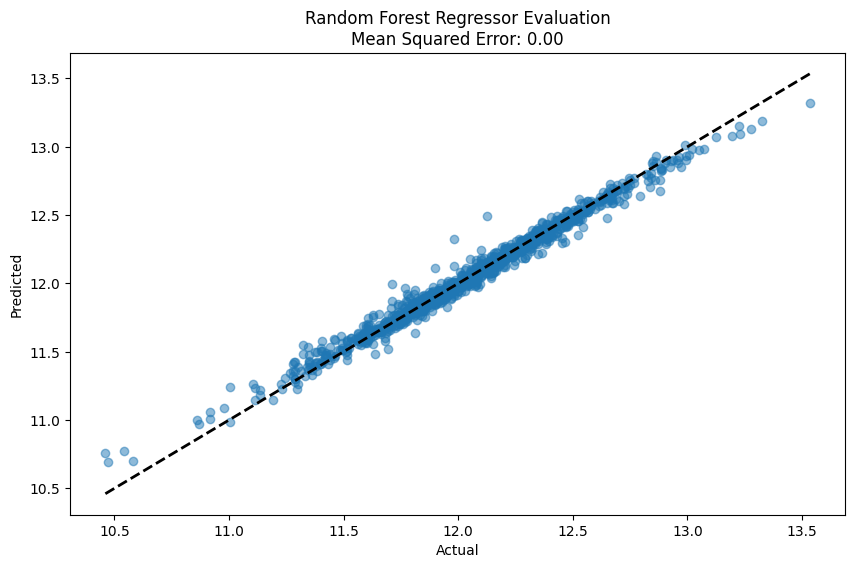

0.0029784177593820036

In [56]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming the RandomForestRegressor model 'RFR' is already trained

# Predicting on the training data
y_pred_rfr = RFR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the RandomForest Regressor
mse_rfr = mean_squared_error(y_train, y_pred_rfr)

# Plotting the actual vs predicted values for the RandomForest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_rfr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regressor Evaluation\nMean Squared Error: {mse_rfr:.2f}')
plt.show()

mse_rfr

# Hypertuning Parameter

In [57]:
params ={
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]                          #bootstrap: Whether to bootstrap samples when building trees.
}
random_search = RandomizedSearchCV(
    estimator=RFR,
    param_distributions=params,
    n_iter=10,                                 # Number of random combinations to try
    cv=10,                                     # Number of cross-validation folds
    scoring="neg_mean_squared_error",          # Scoring metric
    n_jobs=-1,                                 # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
random_search_rf_results = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["neg_mean_squared_error"])],axis=1)
random_search_rf_contour = random_search_rf_results.groupby(['max_depth','n_estimators']).mean()
random_search_rf_contour

min_samples_split  min_samples_leaf  \
max_depth n_estimators                                        
5         100                         3.0          2.333333   
          500                         4.0          2.333333   
10        100                         5.0          1.000000   
          500                         3.5          1.000000   
20        500                        10.0          2.000000   

                        neg_mean_squared_error  
max_depth n_estimators                          
5         100                        -0.027180  
          500                        -0.027028  
10        100                        -0.022711  
          500                        -0.022284  
20        500                        -0.022350

In [59]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Get the best model from the search
best_model = random_search.best_estimator_
print("\nBest model :" ,best_model)


Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

Best model : RandomForestRegressor(max_depth=10, n_estimators=500)


In [60]:
RF = RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=1000) 
RF.fit(X_train , y_train)
scores = cross_val_score(RF, X_train, y_train, cv=10)
print(scores)
print("\n mean of the Scores :" , scores.mean())

[0.88299539 0.77963822 0.87213113 0.84061358 0.88741788 0.80879034
 0.86707335 0.87682291 0.89626147 0.89753587]

 mean of the Scores : 0.8609280140982021


# Prediction Model

In [64]:
#np.set_printoptions(threshold=np.inf)
predict = RF.predict(dataset_test)
min = np.amin(predict)
max = np.amax(predict)
range = np.ptp(predict)
mean = np.mean(predict)
median = np.median(predict)
 
print("min =", min)
print("max =", max)
print("Median =", median)
print("Mean =", mean)
print("range =", range)
print("\nprediction =", predict)

min = 12.184897922343549
max = 12.785000467737925
Median = 12.613514170584029
Mean = 12.611943275876074
range = 0.6001025453943765

prediction = [12.58893309 12.65697792 12.62710416 ... 12.60607243 12.57620034
 12.52907485]
